In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

In [11]:
df = pd.read_csv('./finance.csv', index_col=0)
df

,Country,Year,Government R&D,Corporate R&D,Venture capital,Private equity expansion capital,Public markets,Asset finance,Asset Finance minus Re-invested equity,Small distributed capacity,Private equity buy-outs,Public markets investor exits,Corporate M&A,Project acquisition & refinancing,Total: M&A/ buy-outs etc.,Number of policies
0,China,2000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0
1,China,2001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.0
2,China,2002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.0
3,China,2003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.0
4,China,2004,0.076,0.076,0.016,0.012,0.012,1.284,1.280,0.320,0.032,0.016,0.088,0.204,0.340,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,United States,2012,1.034,0.902,0.528,0.352,0.836,37.422,36.784,15.378,0.660,0.088,2.046,11.660,14.454,13.0
64,United States,2013,1.144,0.880,0.176,0.286,2.156,37.730,37.466,8.844,0.110,0.374,3.564,10.714,14.740,14.0
65,United States,2014,0.990,0.946,0.220,0.374,3.278,50.248,49.478,8.074,0.902,0.352,2.464,15.818,19.536,15.0
66,United States,2015,1.056,0.984,0.336,0.432,2.880,64.248,62.640,7.824,0.864,0.360,4.416,20.304,25.944,16.0


[Text(0.5, 0, 'Government R&D'),
 Text(1.5, 0, 'Corporate R&D'),
 Text(2.5, 0, 'Venture capital'),
 Text(3.5, 0, 'Private equity expansion capital'),
 Text(4.5, 0, 'Public markets'),
 Text(5.5, 0, 'Asset finance'),
 Text(6.5, 0, 'Asset Finance minus Re-invested equity'),
 Text(7.5, 0, 'Small distributed capacity'),
 Text(8.5, 0, 'Private equity buy-outs'),
 Text(9.5, 0, 'Public markets investor exits'),
 Text(10.5, 0, 'Corporate M&A'),
 Text(11.5, 0, 'Project acquisition & refinancing'),
 Text(12.5, 0, 'Total: M&A/ buy-outs etc.'),
 Text(13.5, 0, 'Number of policies')]

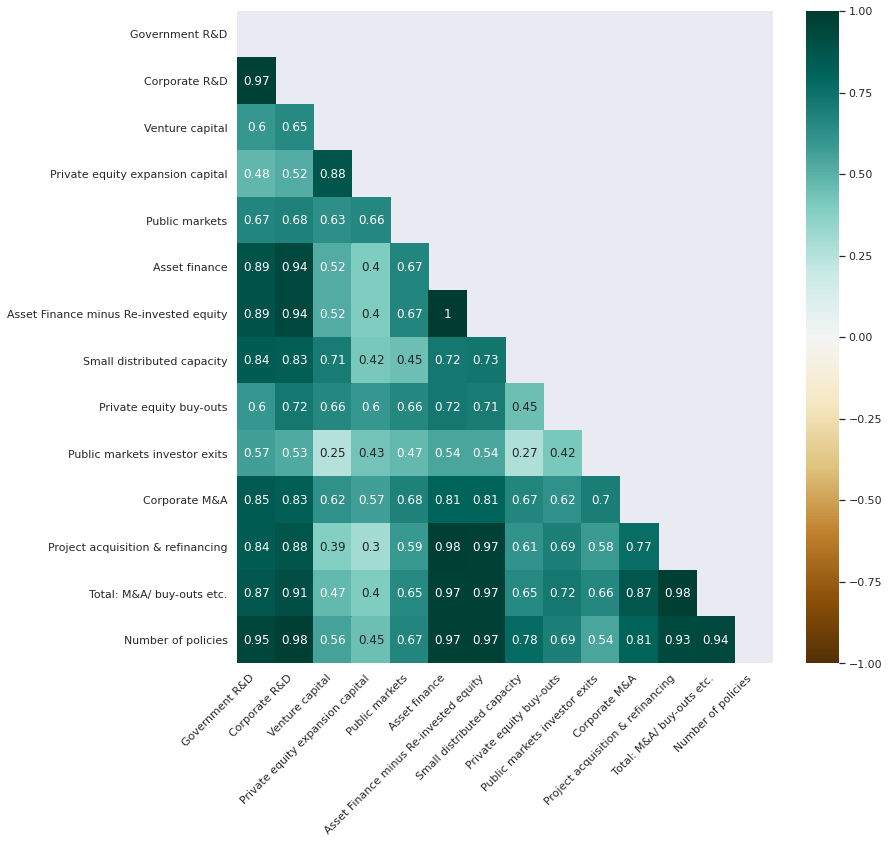

In [15]:
df = df.groupby('Year').sum()

plt.figure(figsize=(12, 12))

corr = np.round(df.corr(), 2)
mask = np.triu(np.ones_like(corr, dtype=bool))

h = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
h.set_xticklabels(h.get_xticklabels(), rotation=45, ha='right')

In [16]:
df

,Government R&D,Corporate R&D,Venture capital,Private equity expansion capital,Public markets,Asset finance,Asset Finance minus Re-invested equity,Small distributed capacity,Private equity buy-outs,Public markets investor exits,Corporate M&A,Project acquisition & refinancing,Total: M&A/ buy-outs etc.,Number of policies
Year,,,,,,,,,,,,,,
2000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.0
2001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,9.0
2002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,12.0
2003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,17.0
2004,0.760,0.760,0.160,0.120,0.120,12.840,12.800,3.200,0.320,0.160,0.880,2.040,3.400,21.0
2005,0.800,0.760,0.240,0.400,1.440,20.000,19.920,4.040,1.480,0.920,3.040,5.000,10.480,26.0
2006,0.880,0.880,0.480,1.160,3.560,31.680,30.800,3.600,0.720,1.040,4.120,7.480,13.360,31.0
2007,1.053,0.897,0.819,1.365,7.683,41.457,40.248,5.421,1.287,1.521,7.722,11.661,22.191,32.0
2008,1.064,1.254,1.254,2.546,3.990,50.730,49.058,8.436,1.938,0.342,6.270,13.604,22.154,40.0


In [17]:
from sklearn.decomposition import PCA

In [18]:
df = df.loc[2004:2016]
pca = PCA(n_components=1)
pca.fit(df.T)
f = pca.components_[0]
f = f / f.max()

<AxesSubplot:xlabel='Year'>

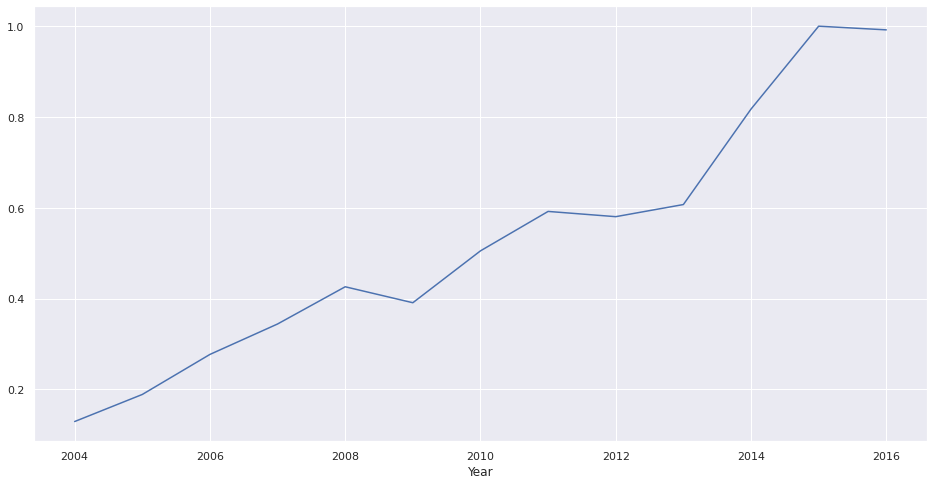

In [19]:
plt.figure(figsize=(16, 8))
sns.lineplot(x=df.index, y=f)